<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/labs/10-mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: MLP and Backprop

In this lab, you will create and train a simple deep neural network. You will implement a simple DNN using the scikit-learn MLPClassifier to perform classification on the following weather dataset. Use the 'Rain' feature as the target.

Here is the documentation for the Scikit-Learn MLP Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Install kagglehub if not already installed. Uncomment and run the line below if needed.
!pip install kagglehub

In [39]:
# Load in data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeeshier/weather-forecast-dataset")
print(path)
df = pd.read_csv(f'{path}/weather_forecast_data.csv')
np.random.seed(42)

Using Colab cache for faster access to the 'weather-forecast-dataset' dataset.
/kaggle/input/weather-forecast-dataset


In [40]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Task 1
Perform a simple exploratory analysis on the data (plot the distribution of rain vs. no rain cases, get counts for features/observations, etc.). Then split the data into a train and test set (70% / 30%), using the 'Rain' column as your target. Stratify your split. Apply any required data preparations or transformations.

In [41]:
df['Rain'].unique()

df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB


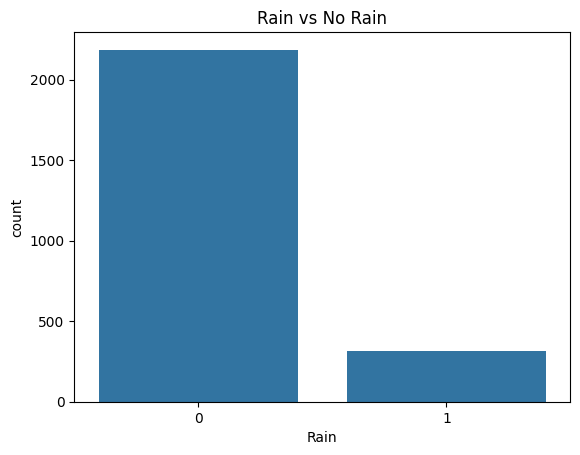

In [42]:
# TODO: Simple EDA

df.info()

df.describe()

df['Rain'].value_counts()

df['Rain'].value_counts(normalize=True)

sns.countplot(x='Rain', data=df)

plt.title('Rain vs No Rain')

plt.show()

In [43]:
# TODO: Split Data into train and test

y = df["Rain"]

x = df.drop(columns = ["Rain"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42, stratify = y)

scaler = StandardScaler()

scaler.fit(x_train)

x_test_scaled = scaler.transform(x_test)

x_train_scaled = scaler.transform(x_train)

Suppose you are performing this analysis for a farmer who's work heavily depends on knowing if and when it is going to rain.  Based on your EDA, what metric or metrics would you focus on to evaluate your model?  Why?

This EDA makes it pretty clear that the classes are imbalanced. The count for no rain exceeds 2000 while the count for rain is less than 500. Farmers care about accurately predicting when it's going to rain, so false negatives are the biggest risk. Because of this, the F1 score and the recall for the Rain class are the most important metrics to focus on for model evlaution here.

## Task 2
Your next task is to experiment with various MLP architectures to find an optimal model. This will require playing around with different numbers and sizes of hidden layers, trying different activation functions, and finding other hyperparameters to play around with. Use the metric chosen in Task 1 on your test set as your evaluation metric.

In [45]:
# TODO: Build and fit a simple MLP

from sklearn.metrics import recall_score, f1_score, classification_report

simple = MLPClassifier(

    hidden_layer_sizes = (16,),

    activation = "relu",

    max_iter = 500,

    random_state = 42
)

simple.fit(x_train_scaled, y_train)

y_simple = simple.predict(x_test_scaled)

print(classification_report(y_test, y_simple))

rain_recall_simple = recall_score(y_test, y_simple, pos_label=1)

rain_f1_simple = f1_score(y_test, y_simple, pos_label=1)

print("Simple MLP Rain recall:", rain_recall_simple)

print("Simple MLP Rain F1:", rain_f1_simple)


# TODO: Test different architectures (adjust the 'hidden_layer_sizes' value)

simple2 = MLPClassifier(

    hidden_layer_sizes = (32,),

    activation = "relu",

    max_iter = 500,

    random_state = 42
)

simple2.fit(x_train_scaled, y_train)

y_simple2 = simple2.predict(x_test_scaled)

print(classification_report(y_test, y_simple2))

rain_recall_simple2 = recall_score(y_test, y_simple2, pos_label=1)

rain_f1_simple2 = f1_score(y_test, y_simple2, pos_label=1)

print("Simple2 MLP Rain recall:", rain_recall_simple2)

print("Simple2 MLP Rain F1:", rain_f1_simple2)


simple3 = MLPClassifier(

    hidden_layer_sizes = (16, 32),

    activation = "relu",

    max_iter = 500,

    random_state = 42
)

simple3.fit(x_train_scaled, y_train)

y_simple3 = simple3.predict(x_test_scaled)

print(classification_report(y_test, y_simple3))

rain_recall_simple3 = recall_score(y_test, y_simple3, pos_label=1)

rain_f1_simple3 = f1_score(y_test, y_simple3, pos_label=1)

print("Simple MLP3 Rain recall:", rain_recall_simple3)

print("Simple MLP3 Rain F1:", rain_f1_simple3)


# TODO: Test different activation functions

simple4 = MLPClassifier(

    hidden_layer_sizes = (16, 32),

    activation = "tanh",

    max_iter = 500,

    random_state = 42
)

simple4.fit(x_train_scaled, y_train)

y_simple4 = simple4.predict(x_test_scaled)

print(classification_report(y_test, y_simple4))

rain_recall_simple4 = recall_score(y_test, y_simple4, pos_label=1)

rain_f1_simple4 = f1_score(y_test, y_simple4, pos_label=1)

print("Simple MLP4 Rain recall:", rain_recall_simple4)

print("Simple MLP4 Rain F1:", rain_f1_simple4)


simple5 = MLPClassifier(

    hidden_layer_sizes = (16, 32),

    activation = "logistic",

    max_iter = 500,

    random_state = 42
)

simple5.fit(x_train_scaled, y_train)

y_simple5 = simple5.predict(x_test_scaled)

print(classification_report(y_test, y_simple5))

rain_recall_simple5 = recall_score(y_test, y_simple5, pos_label=1)

rain_f1_simple5 = f1_score(y_test, y_simple5, pos_label=1)

print("Simple MLP5 Rain recall:", rain_recall_simple5)

print("Simple MLP5 Rain F1:", rain_f1_simple5)



              precision    recall  f1-score   support

           0       0.98      0.99      0.99       656
           1       0.90      0.89      0.90        94

    accuracy                           0.97       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.97      0.97      0.97       750

Simple MLP Rain recall: 0.8936170212765957
Simple MLP Rain F1: 0.8983957219251337
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       656
           1       0.94      0.90      0.92        94

    accuracy                           0.98       750
   macro avg       0.97      0.95      0.96       750
weighted avg       0.98      0.98      0.98       750

Simple2 MLP Rain recall: 0.9042553191489362
Simple2 MLP Rain F1: 0.9239130434782609
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       0.97      0.97      0.97        94

    accuracy    

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       656
           1       0.91      0.93      0.92        94

    accuracy                           0.98       750
   macro avg       0.95      0.96      0.95       750
weighted avg       0.98      0.98      0.98       750

Simple MLP4 Rain recall: 0.925531914893617
Simple MLP4 Rain F1: 0.9157894736842105
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       656
           1       0.92      0.93      0.92        94

    accuracy                           0.98       750
   macro avg       0.95      0.96      0.95       750
weighted avg       0.98      0.98      0.98       750

Simple MLP5 Rain recall: 0.925531914893617
Simple MLP5 Rain F1: 0.9206349206349206


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


What number of hidden layers worked best for you? What size were they? Why do you think this architecture worked better than others?

Using 2 hidden layers of sizes (16, 32) worked best for me. I think this worked best because it had the capacity to register non-linear relationships and didn't underfit the data like smaller models might have.

Briefly read into the different activation functions and what makes each one unique. Which one worked best for you? Why do you think that is?

The ReLU function worked best for me, having the highest recall and f1 score. I think this worked best because it learns non-linear patterns better than other models and avoids vanishing gradients.

## Task 3
a) Fit a random forest and logistic regression to this same dataset. See how their performance compares to your best MLP. These libaries are already imported. Documentation can be found at the following links.

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [47]:
# TODO: Implement random forest

rf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42
)

rf.fit(x_train, y_train)

preds = rf.predict(x_test)

print(classification_report(y_test, preds))

rf_rain_recall = recall_score(y_test, preds, pos_label=1)

rf_rain_f1 = f1_score(y_test, preds, pos_label=1)

print("RF Rain recall:", rf_rain_recall)

print("RF Rain F1:", rf_rain_f1)

rf_importances = rf.feature_importances_


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       1.00      1.00      1.00        94

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

RF Rain recall: 1.0
RF Rain F1: 1.0


In [49]:
# TODO: Implement logistic regression

log = LogisticRegression(
    max_iter = 1000
)

log.fit(x_train_scaled, y_train)

preds2 = log.predict(x_test_scaled)

print(classification_report(y_test, preds2))

log_rain_recall = recall_score(y_test, preds2, pos_label=1)

log_rain_f1 = f1_score(y_test, preds2, pos_label=1)

print("LogReg Rain recall:", log_rain_recall)

print("LogReg Rain F1:", log_rain_f1)

log_coeffs = np.abs(log.coef_[0])


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       656
           1       0.69      0.63      0.66        94

    accuracy                           0.92       750
   macro avg       0.82      0.79      0.81       750
weighted avg       0.92      0.92      0.92       750

LogReg Rain recall: 0.6276595744680851
LogReg Rain F1: 0.659217877094972


In [50]:
from sklearn.inspection import permutation_importance

mlp = permutation_importance(

    estimator=simple3,

    X=x_test_scaled,

    y=y_test,

    n_repeats=10,

    random_state=42
)

mlp_importances = mlp.importances_mean

b) For each model, determine a measure of variable importance. For the random forest, you can use the feature importances_ attribute. For the logistic regression, you can use the absolute value of the coefficients. For the MLP, you can use permutation importance (see documentation below).

[Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html)

In [51]:
# TODO: Feature importances here

feature_names = x.columns

rf_importances = rf.feature_importances_

print(rf_importances)

log_importances = abs(log.coef_[0])

print(log_importances)

mlp_importances = mlp.importances_mean

print(mlp_importances)

[0.27029784 0.37987843 0.01190464 0.32395813 0.01396096]
[1.88584772 2.73885506 0.03096509 2.35411421 0.05555586]
[ 0.09826667  0.1376      0.00133333  0.1228     -0.00173333]


c) For each set of importances, plot the feature importances using a bar plot, sorted by importance. Include each of the three plots in a single figure with three subplots. (Note: the three sets of scores will be on different scales)

/tmp/ipython-input-1101762005.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(rf_final_sorted, rotation=45, ha='right')
/tmp/ipython-input-1101762005.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(log_final_sorted, rotation=45, ha='right')
/tmp/ipython-input-1101762005.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(mlp_final_sorted, rotation=45, ha='right')


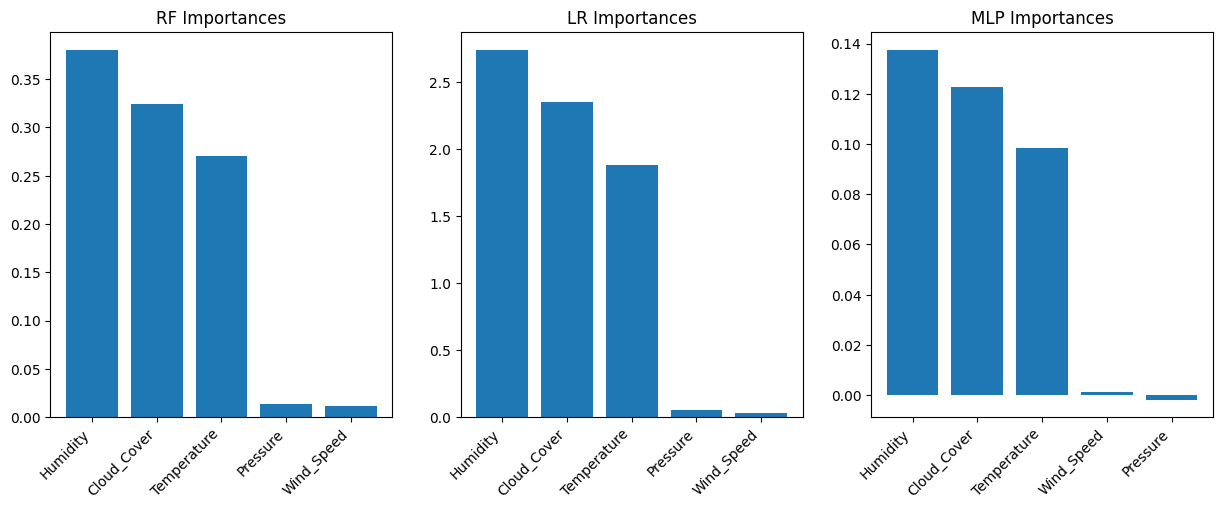

In [52]:
# TODO: Plot feature importances here

rf_indx = np.argsort(rf_importances)[::-1]

rf_sorted = rf_importances[rf_indx]

rf_final_sorted = feature_names[rf_indx]

log_indx = np.argsort(log_importances)[::-1]

log_sorted = log_importances[log_indx]

log_final_sorted = feature_names[log_indx]

mlp_indx = np.argsort(mlp_importances)[::-1]

mlp_sorted = mlp_importances[mlp_indx]

mlp_final_sorted = feature_names[mlp_indx]

figure, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(rf_final_sorted, rf_sorted)

axes[0].set_title("RF Importances")

axes[0].set_xticklabels(rf_final_sorted, rotation=45, ha='right')

axes[1].bar(log_final_sorted, log_sorted)

axes[1].set_title("LR Importances")

axes[1].set_xticklabels(log_final_sorted, rotation=45, ha='right')

axes[2].bar(mlp_final_sorted, mlp_sorted)

axes[2].set_title("MLP Importances")

axes[2].set_xticklabels(mlp_final_sorted, rotation=45, ha='right')

plt.show()



How does the MLP compare to Logistic Regression and Random Forest?

The MLP clearly out performed the Logistic Regression Model, as the dataset had nonlinear patterns. Random Forest outperformed both of the other models, having nearly a perfect score. This made sense because tree based models handel interactions between features and don't need scaling.

Do the feature importances agree between the models? Do the importances intuitively make sense? Explain.

The models mostly agreed on important features. Temp, cloud cover, and humidity were almost always at the top, which seems intuitive for predicting rain. Differences between them mainly occured as the linear regression model focused on the linear effects, but they were mostly the same.

What are the tradeoffs between model complexity and model interpretability?

As model complexity increases, accuracy often does as well. However, the predictions complex models make can be hard to interpret. Simple models are less accurate generally, but they have increased transparency and are easier to interpret.